## ROC Plot for MY-BENCHMARK: HMMER vs MMseqs vs MMseqs+fb-pruner

## MY-BENCHMARK Dataset

In [34]:
### Imports ###
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

In [35]:
### MatPlotLib settings ###

# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)

database = "my-benchmark"
version = "002"
# params = "12.16.5."
params = ""

In [36]:
### Root Directory ###
path_to_db = "data/{}/".format(database)

In [37]:
### Filepaths ###

mmoreseqs_fname     = "{}/mmoreseqs.mybench.myout.sample".format(path_to_db)
# mmoreseqs_full_fname = "{}/mmore.mybench.full.myout.old.tmp".format(path_to_db)

# load data

In [38]:
datas = []

# set header format
tf_dformat = {
    "id": "int",
    "target_name": "str",
    "query_name": "str",
    "target_len": "int",
    "query_len": "int",
    "eval": "float",
    "pre-sc": "float",
    "comp-bias": "float",
    "seq_sc": "float",
    "dom-sum-sc": "float",
    "mmseqs-vit-sc": "float",
    "total-cells": "int",
    "mmore-cells": "int",
    "perc-cells": "float",
    "q-range": "int",
    "t-range": "int",
    "time": "time"
}
tf_header = tf_dformat.keys()

# load data
usecols = [0,1,2,3,4,5]
skiprows = None
sep = "\t"
names = tf_header

In [39]:
mmoreseqs_data = pd.read_csv( mmoreseqs_fname, sep=sep, header=None, skiprows=skiprows, names=names, index_col=False, verbose=False )
datas.append( mmoreseqs_data )
data = mmoreseqs_data.sample( frac = 0.01 )
data = data.sort_values( by=['total-cells'] )
data

/home/devreckas/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,target_name,query_name,target_len,query_len,eval,pre-sc,comp-bias,seq_sc,dom-sum-sc,mmseqs-vit-sc,total-cells,mmore-cells,perc-cells,q-range,t-range,time
95539,8691,TPR_8,decoy331945,34,512,2020000.0,-7.009,56.987,-63.997,-11.300,4880000.0,17955.0,4160,0.23169,1-35,0-214,8-27
93714,9076,CPG4,decoy1414951,93,203,2020000.0,-10.780,59.157,-69.937,-inf,5668000.0,19176.0,6709,0.34986,1-94,0-119,72-76
30254,2296,DUF4274,decoy717299,76,321,2020000.0,-11.364,20.948,-32.313,-15.509,277000.0,24794.0,4679,0.18872,1-77,0-184,15-26
43649,5625,NTP_transf_2,decoy537644,93,276,2020000.0,-7.218,39.709,-46.927,-8.780,85700.0,26038.0,2792,0.10723,1-69,0-88,11-27
66204,2323,Nup35_RRM_2,decoy346279,53,489,2020000.0,-13.907,21.100,-35.007,-inf,3543000.0,26460.0,7821,0.29558,1-54,0-241,41-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,2574,RIC1,decoy124983,254,8886,2020000.0,-17.647,22.515,-40.162,-21.534,115700.0,2266185.0,196477,0.0867,1-255,0-6697,187-200
83044,8928,FUSC-like,decoy1999160,284,8892,2020000.0,-22.926,58.323,-81.249,-26.100,1650000.0,2534505.0,34239,0.01351,1-285,0-2623,18-26
79777,5783,DUF3808,decoy1009615,456,5588,2020000.0,-20.697,40.599,-61.296,-22.430,302800.0,2554173.0,12814,0.00502,1-181,0-220,43-74
89537,6541,DDE_Tnp_1_7,decoy1508942,355,10421,2020000.0,-23.657,44.871,-68.528,-30.694,526300.0,3710232.0,41417,0.01116,1-356,0-1341,162-170


In [40]:
data["total-cells"]

95539      17955.0
93714      19176.0
30254      24794.0
43649      26038.0
66204      26460.0
           ...    
26446    2266185.0
83044    2534505.0
79777    2554173.0
89537    3710232.0
48659    4888455.0
Name: total-cells, Length: 1000, dtype: float64

In [41]:
# titin data
titin_data = {}
titin_data["mmore-cells"] = []
titin_data["total-cells"] = []

titin_data["mmore-cells"] = [471150, 481835, 229044, 470533, 217165, 163790, 877454, 140565, 208471, 110774, 187499, 477284, 93972, 462990, 99180, 84243, 85769]
titin_data["total-cells"] = [1179922500, 193562250, 1209566550, 193527900, 210453049, 110208004, 99090622, 79263409, 79165476, 45670564, 45907094, 193562250, 31753225, 198425255, 31747590, 25381444, 25366330]
titin_data["perc-cells"] = []

for i in range(len(titin_data["total-cells"])):
    perc = titin_data["mmore-cells"][i] / titin_data["total-cells"][i]
    titin_data["perc-cells"].append(perc)

titin_data["perc-cells"]

[0.00039930588661543447,
 0.0024893025370391177,
 0.00018936039525894628,
 0.002431344524484583,
 0.0010318928665177,
 0.0014861896963490964,
 0.008855066022292201,
 0.0017733907962500075,
 0.0026333575004336487,
 0.00242550102950338,
 0.0040843142892033205,
 0.0024657907210729364,
 0.0029594474262063146,
 0.002333321935254663,
 0.0031240166576423597,
 0.0033190782998792348,
 0.0033812143893105547]

In [42]:
# fit to linear regression
mod = smf.quantreg('total ~ mmore', data)
sm..regression.linear_model.OLS(  )

SyntaxError: invalid syntax (<ipython-input-42-ec26087d2d2f>, line 3)

In [43]:
# min-max range
max_cells = max(data['total-cells'])
cells = [0, max_cells * 2]

max_titin_cells = max(titin_data["total-cells"])
titin_cells = [0, max_titin_cells * 2]

TypeError: 'value' must be an instance of str or bytes, not a int

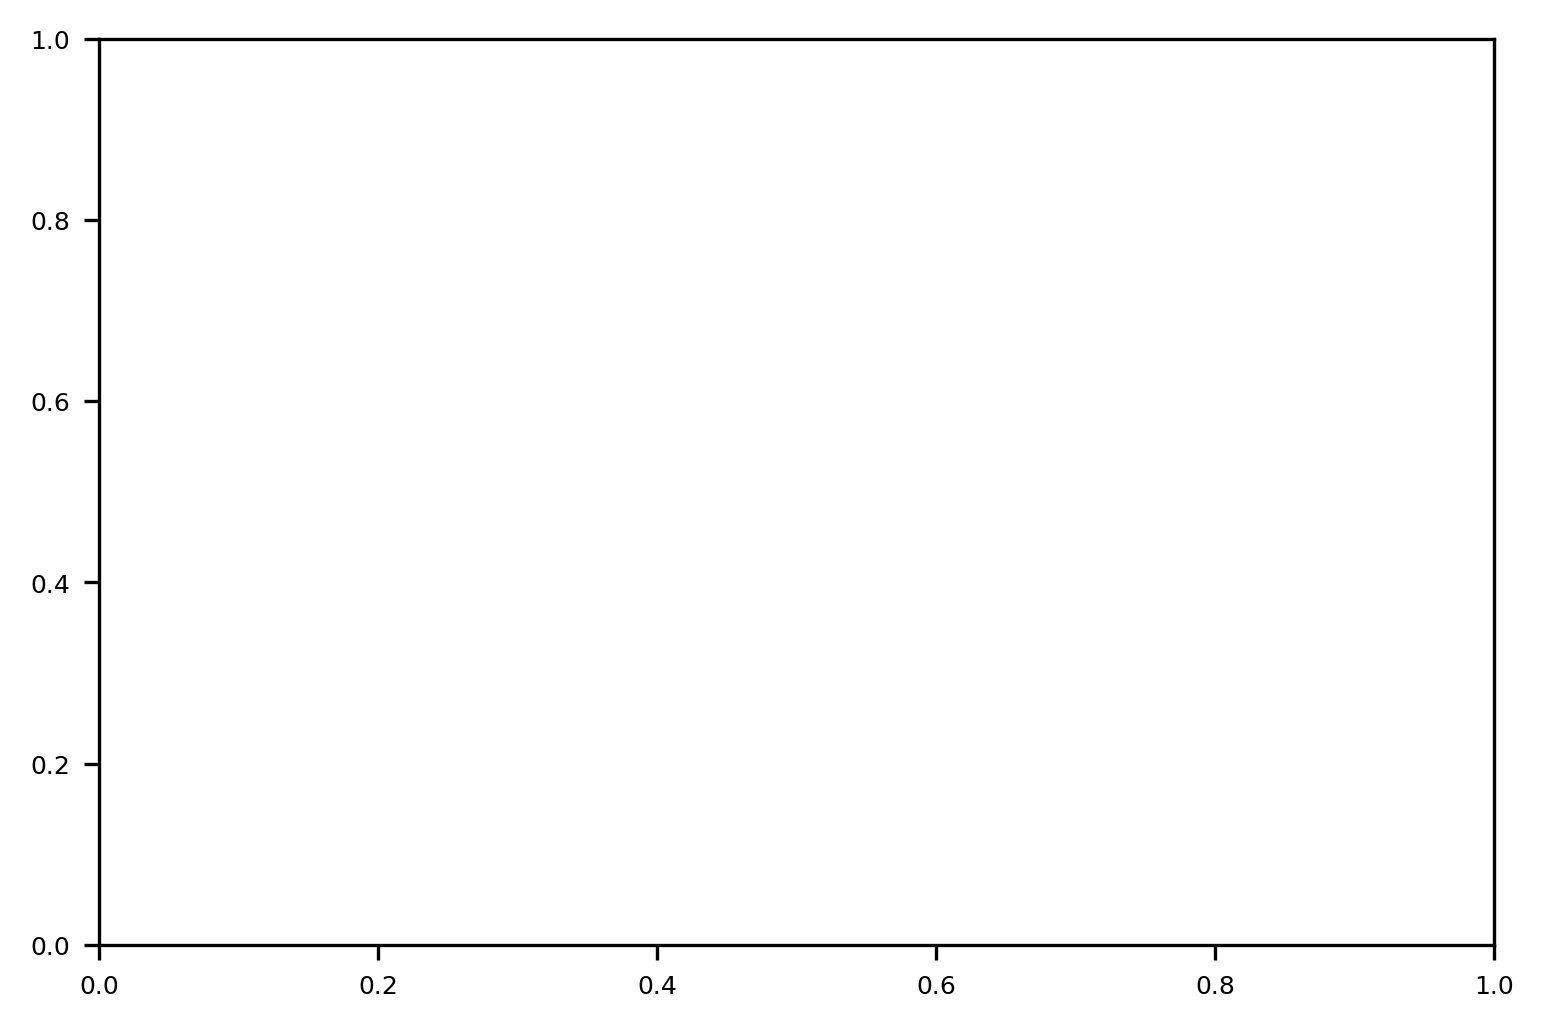

In [44]:
# fit line
# m,b = np.polyfit( data["total-cells"], data["mmore-cells"], 1 )
# print("full-forward: f(x) = {:.2}x + {:.2}".format(m,b))
# fwd_fitline = [ m * min_sc + b, m * max_sc + b ] 

# data
plt.scatter( data["total-cells"], data["mmore-cells"], color='green', alpha=0.25, s=2.0, label='MMORE Profmark++' )
plt.plot( cells, cells, color='darkblue', alpha=.75, linewidth=1.0, label='Forward-Backward' )

# graph
# yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
# plt.yticks(yticks)

# plot labels
plt.title('cells computed: forward-backward vs. mmore')
plt.xlabel('total cells (query length x target length)')
plt.ylabel('cells computed')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')

# show
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a int

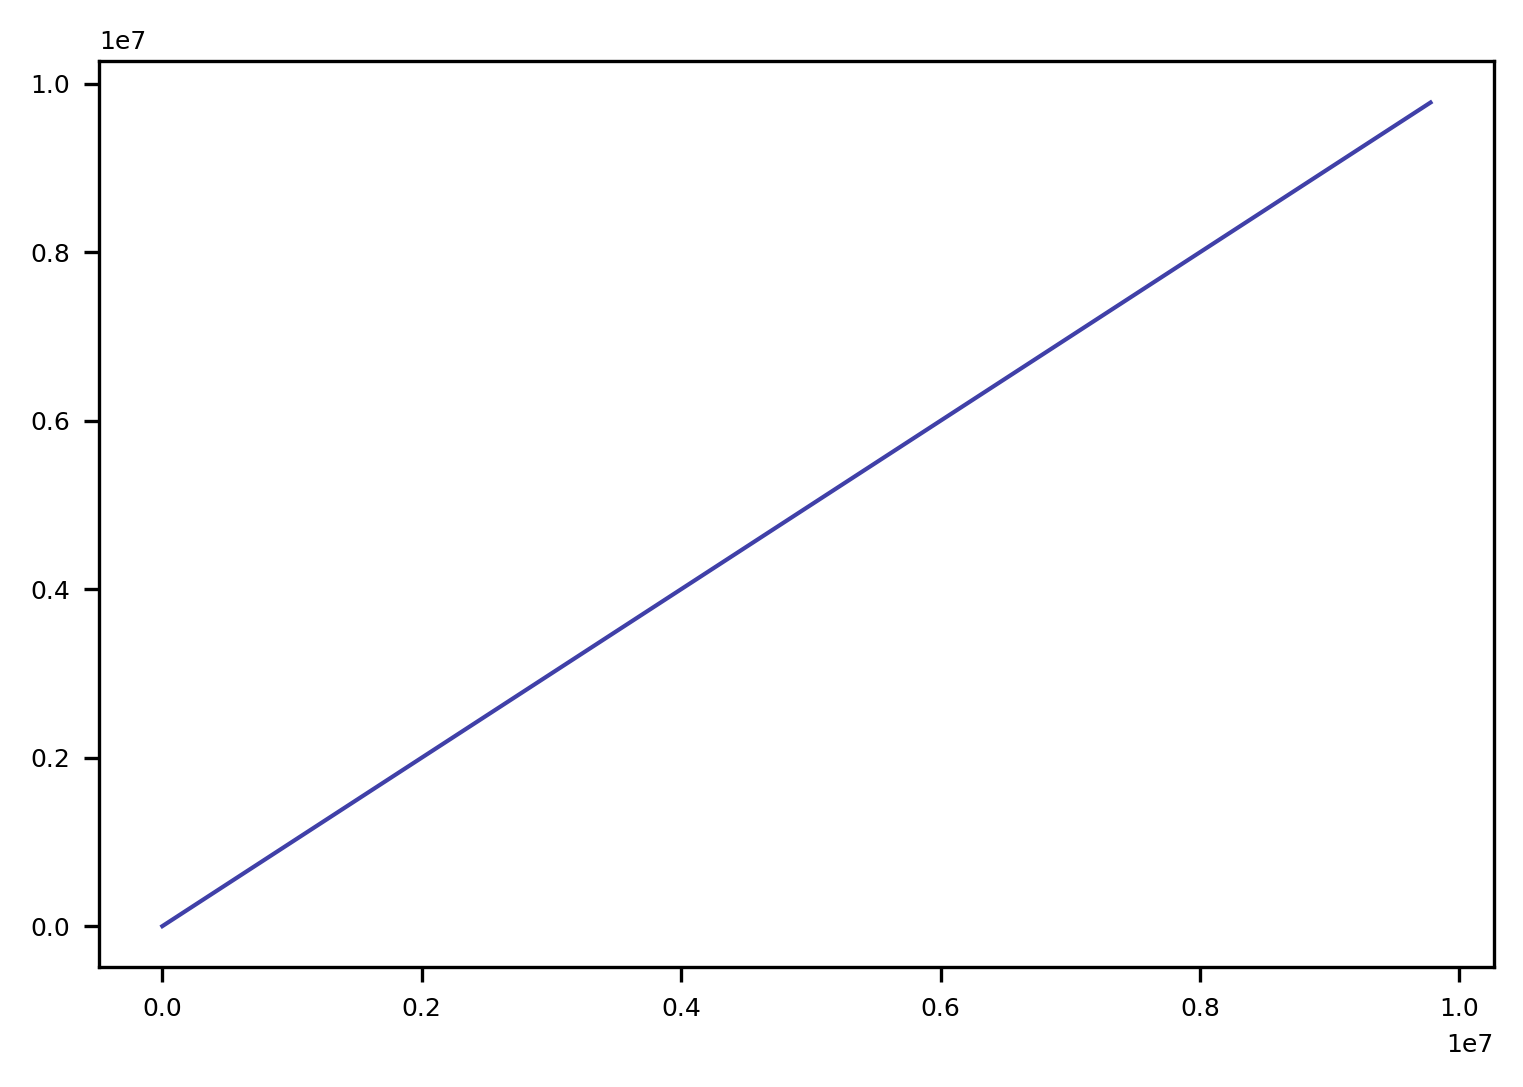

In [45]:
# data
plt.plot( cells, cells, color='darkblue', alpha=.75, linewidth=1.0, label='Forward-Backward' )
plt.scatter( data["total-cells"], data["mmore-cells"], color='green', alpha=0.25, s=2.0, label='MMORE Profmark++' )
plt.scatter( titin_data["total-cells"], titin_data["mmore-cells"], color='orange', alpha=1, s=2.0, label='MMORE Titin' )

# graph
# yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
# plt.yticks(yticks)

# plot labels
plt.title('cells computed: forward-backward vs. mmore')
plt.xlabel('total cells (query length x target length)')
plt.ylabel('cells computed')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')

# show
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

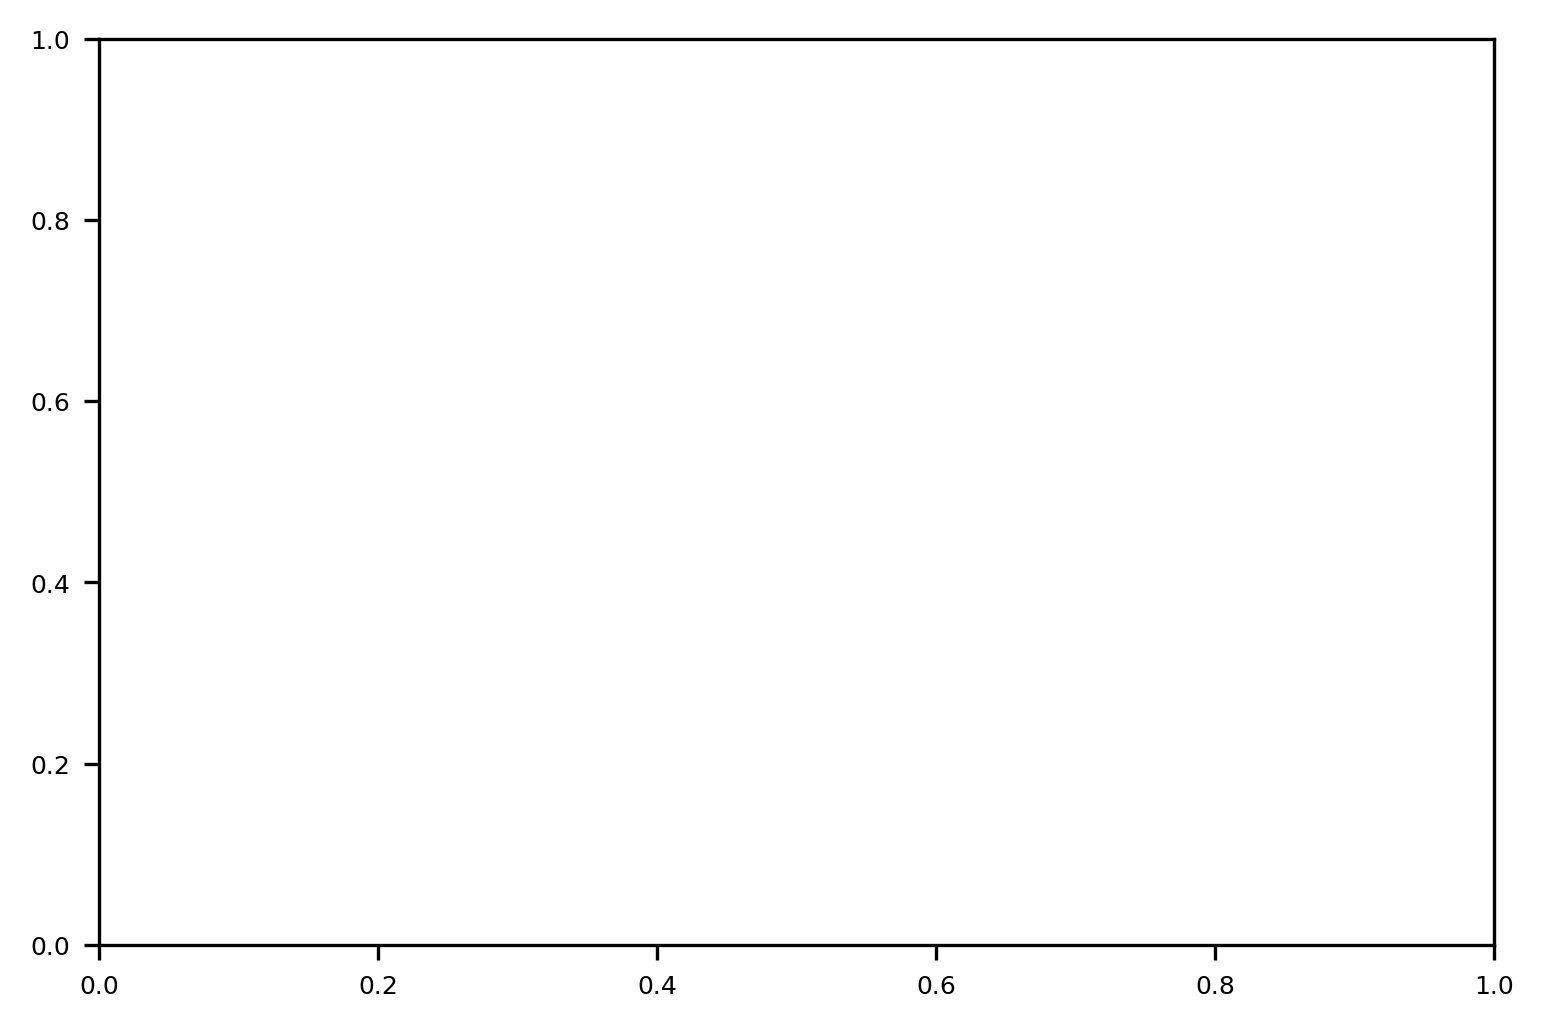

In [46]:
# data
plt.scatter( data["total-cells"], data["perc-cells"], color='green', alpha=0.5, s=2.0, label='mmore' )
plt.plot( [0,max_cells], [1,1], color='darkblue', alpha=.75, linewidth=1.0, label='forward-backward' )

# graph
# yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
# plt.yticks(yticks)

# plot labels
plt.title('cells computed: forward-backward vs. mmore')
plt.xlabel('total cells (query length x target length)')
plt.ylabel('cells computed')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')

# show
plt.show()

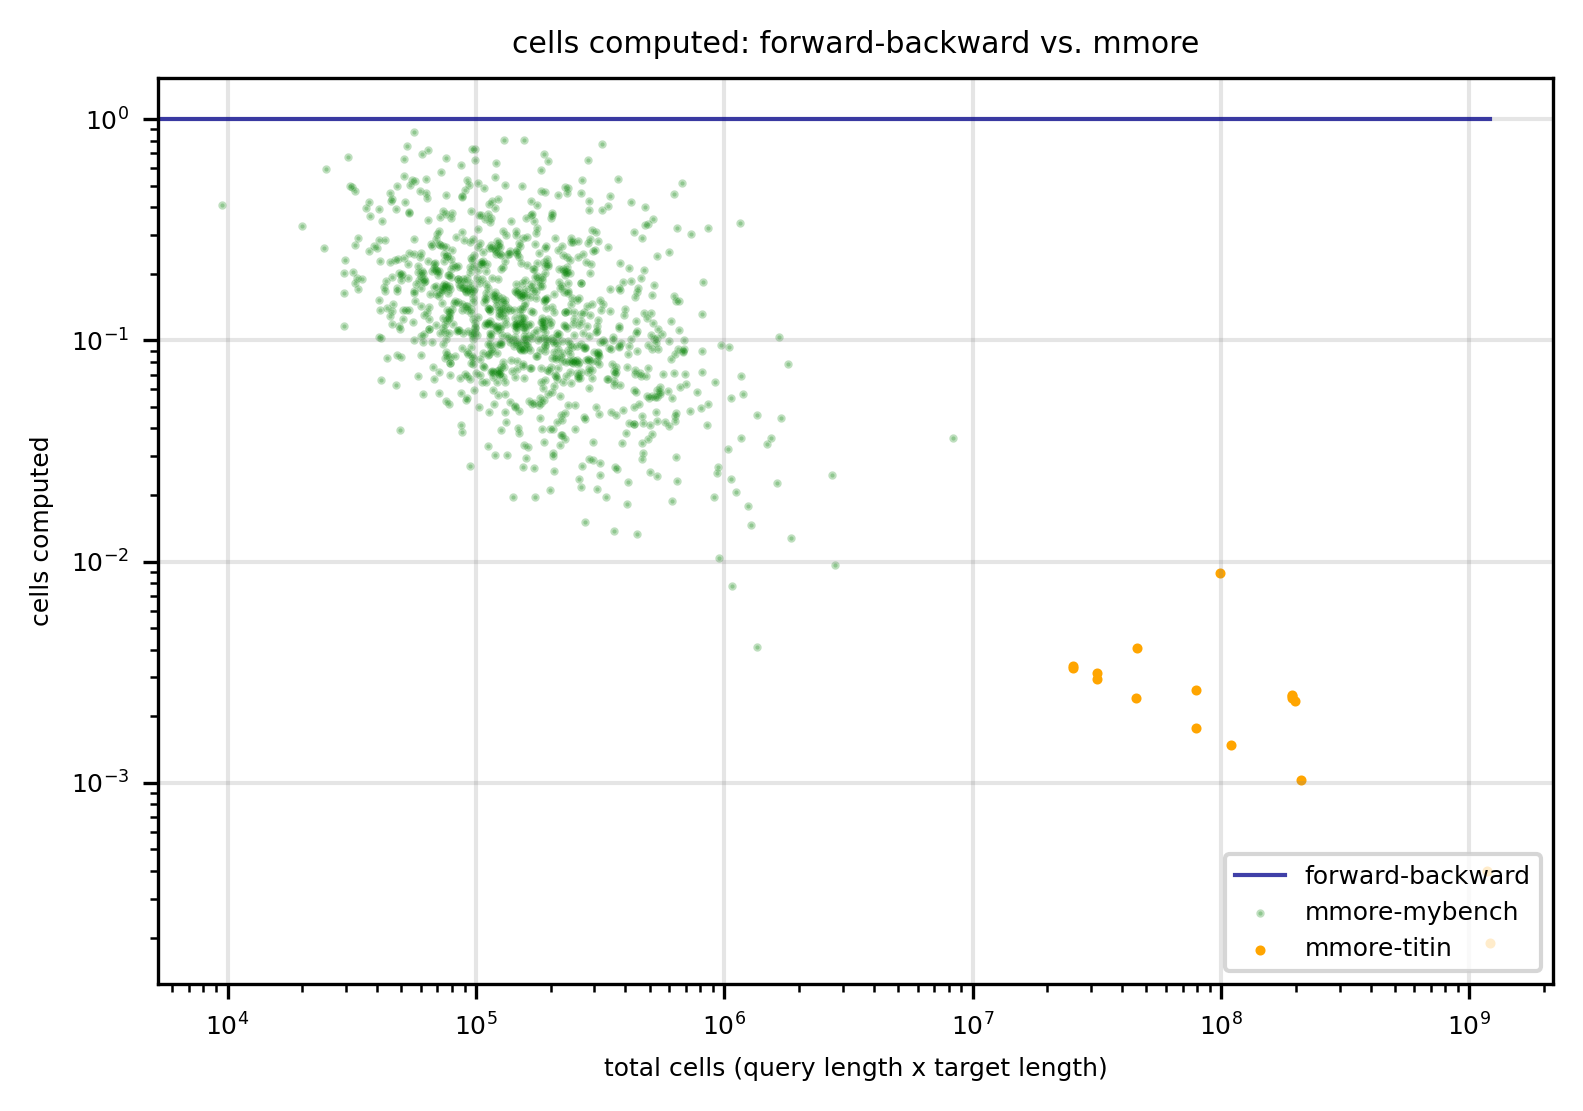

In [15]:
# data
plt.scatter( data["total-cells"], data["perc-cells"], color='green', alpha=0.25, s=1.0, label='mmore-mybench' )
plt.plot( [0, max_titin_cells], [1,1], color='darkblue', alpha=.75, linewidth=1.0, label='forward-backward' )
plt.scatter( titin_data["total-cells"], titin_data["perc-cells"], color='orange', alpha=1, s=2.0, label='mmore-titin')

# graph
# yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
# plt.yticks(yticks)

# plot labels
plt.title('cells computed: forward-backward vs. mmore')
plt.xlabel('total cells (query length x target length)')
plt.ylabel('cells computed')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')

# show
plt.show()